In [ ]:
# 패키지 임포트
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np

np.random.seed(3)

# 학습 데이터 셋과 테스트 데이터 셋 로딩
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
print (X_train.ndim); print(X_train.shape); print(X_train.dtype); print(X_train[0,:,:])

3
(60000, 28, 28)
uint8
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 25

In [ ]:
print (Y_train.ndim); print(Y_train.shape); print(Y_train.dtype); print(Y_train[0])

1
(60000,)
uint8
5


In [ ]:
print (X_test.ndim); print(X_test.shape); print(X_test.dtype); print(X_test[0,:,:])

3
(10000, 28, 28)
uint8
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  84 185 159 151  60  36   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 222 254 254 25

In [ ]:
print (Y_test.ndim); print(Y_test.shape); print(Y_test.dtype); print(Y_test[0])

1
(10000,)
uint8
7


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

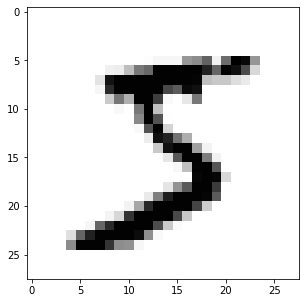

In [ ]:
# 학습 데이터 이미지 확인
plt.figure(figsize=(5,5))
image=np.reshape(X_train[0],[28,28])
plt.imshow(image,cmap='Greys')
plt.show()

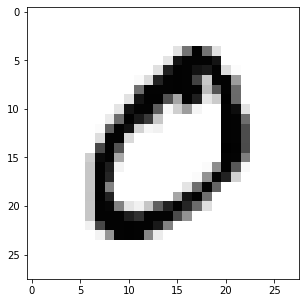

In [ ]:
plt.figure(figsize=(5,5))
image=np.reshape(X_train[1],[28,28])
plt.imshow(image,cmap='Greys')
plt.show()

In [ ]:
# 학습 데이터 셋과 검증데이터 셋 분리
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]

# 데이터 표준화 (0~1 사이 값으로)
X_train = X_train.reshape(50000, 784).astype('float32') / 255.0
X_val = X_val.reshape(10000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0

# 학습 데이터 셋, 검증데이터 셋 고르기 (강의 시간 고려하여..)
#train_rand_idxs = np.random.choice(50000, 1000)
#val_rand_idxs = np.random.choice(10000, 300)

#X_train = X_train[train_rand_idxs]
#Y_train = Y_train[train_rand_idxs]
#X_val = X_val[val_rand_idxs]
#Y_val = Y_val[val_rand_idxs]

# One hot encoding
Y_train = np_utils.to_categorical(Y_train)
Y_val = np_utils.to_categorical(Y_val)
Y_test = np_utils.to_categorical(Y_test)

In [ ]:
# 모델 설계
model = Sequential()
model.add(Dense(units=256, input_dim=784, activation='relu'))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=25, activation='relu'))
model.add(Dense(units=25, activation='relu'))
model.add(Dense(units=10, activation='softmax'))  # 다중클래스 분류 문제

# 모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [ ]:
# 모델 학습
hist = model.fit(X_train, Y_train, epochs=500, batch_size=10, validation_data=(X_val, Y_val))

Epoch 1/500
100/100 [==============================] - 0s 4ms/step - loss: 2.2862 - accuracy: 0.1360 - val_loss: 2.2469 - val_accuracy: 0.2633
Epoch 2/500
100/100 [==============================] - 0s 2ms/step - loss: 2.1984 - accuracy: 0.3140 - val_loss: 2.1122 - val_accuracy: 0.3100
Epoch 3/500
100/100 [==============================] - 0s 3ms/step - loss: 1.9897 - accuracy: 0.3720 - val_loss: 1.8081 - val_accuracy: 0.3833
Epoch 4/500
100/100 [==============================] - 0s 2ms/step - loss: 1.5864 - accuracy: 0.4750 - val_loss: 1.3211 - val_accuracy: 0.5367
Epoch 5/500
100/100 [==============================] - 0s 2ms/step - loss: 1.1769 - accuracy: 0.6480 - val_loss: 1.0682 - val_accuracy: 0.6667
Epoch 6/500
100/100 [==============================] - 0s 2ms/step - loss: 0.9126 - accuracy: 0.7310 - val_loss: 0.8628 - val_accuracy: 0.7200
Epoch 7/500
100/100 [==============================] - 0s 2ms/step - loss: 0.7572 - accuracy: 0.7750 - val_loss: 0.6360 - val_accuracy: 0.8367

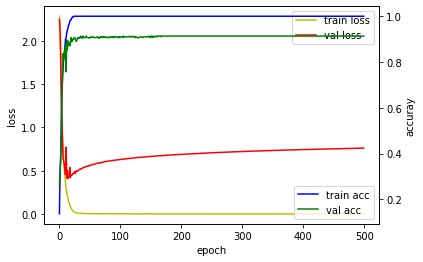

In [ ]:
# 모델 학습 과정 모니터링
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper right')
acc_ax.legend(loc='lower right')

plt.show()

In [ ]:
# 모델 평가 
score = model.evaluate(X_test, Y_test, verbose=1)
print('\n''Test accuracy:', score[1]) 

NameError: ignored

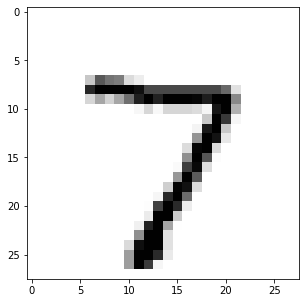

In [ ]:
# 분류 이미지 정답 확인
plt.figure(figsize=(5,5))
image=np.reshape(X_test[0],[28,28])
plt.imshow(image,cmap='Greys')
plt.show()

In [ ]:
print(X_test[0].shape)

(784,)


In [ ]:
# 분류 이미지 예측 확인
pred = model.predict_classes(np.reshape(X_test[0],[1,784]), verbose=2)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
1/1 - 0s


In [ ]:
print(pred)

[7]
